# California Housing - Machine Learning

O propósito deste estudo é preparar os dados do dataset abaixo para criação de modelos de regressão usando Random Forest, XGBoost e LightGBM

## Dicionário de dados (em inglês)

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house with reference to ocean/sea

<span style="font-family: Arial Narrow, Arial, sans-serif; float:right;font-size: 11px; clear:both;">Fonte: <a href="https://www.kaggle.com/datasets/camnugent/california-housing-prices">Kaggle - California Housing Prices</a></span>

## 0) Imports

Import das bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 0.1) Configurações

In [2]:
%matplotlib inline

warnings.filterwarnings("ignore")

RANDOM_STATE = 73

# 1) Carga do dataset

In [3]:
df = pd.read_csv('housing.csv')

## 1.1) Visualização dos Dados

In [4]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1.2) Dicionário de Dados

Tradução/Interpretação à partir do dicionário de dados em inglês após breve inspeção dos dados

| # | Coluna | Descrição |
|---:|:-------------|:-----------|
| 1 | longitude | Longitude do Distrito |
| 2 | latitude | Latitude do Distrito |
| 3 | housing_median_age | Idade Média da Casa no Distrito |
| 4 | total_rooms | Total de Cômodos no Distrito |
| 5 | total_bedrooms | Total de Dormitórios no Distrito |
| 6 | population | População no Distrito |
| 7 | households | Total de Agragados Familiares no Distrito |
| 8 | median_income | Renda Média no Distrito |
| 9 | median_house_value | Valor Médio da Casa no Distrito |
| 10 | ocean_proximity | Distância Até a Praia |


# 2) Análise Exploratória dos dados

# 2.1) Dataset

In [5]:
display(df.head(5))
display(df.tail(5))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## 2.2) Estatísticas do dataset

### 2.2.1) Variáveis Quantitativas

In [6]:
display(df.shape)
display(df.info())

(20640, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### 2.2.2) Gráficos das Variáveis Quantitativas

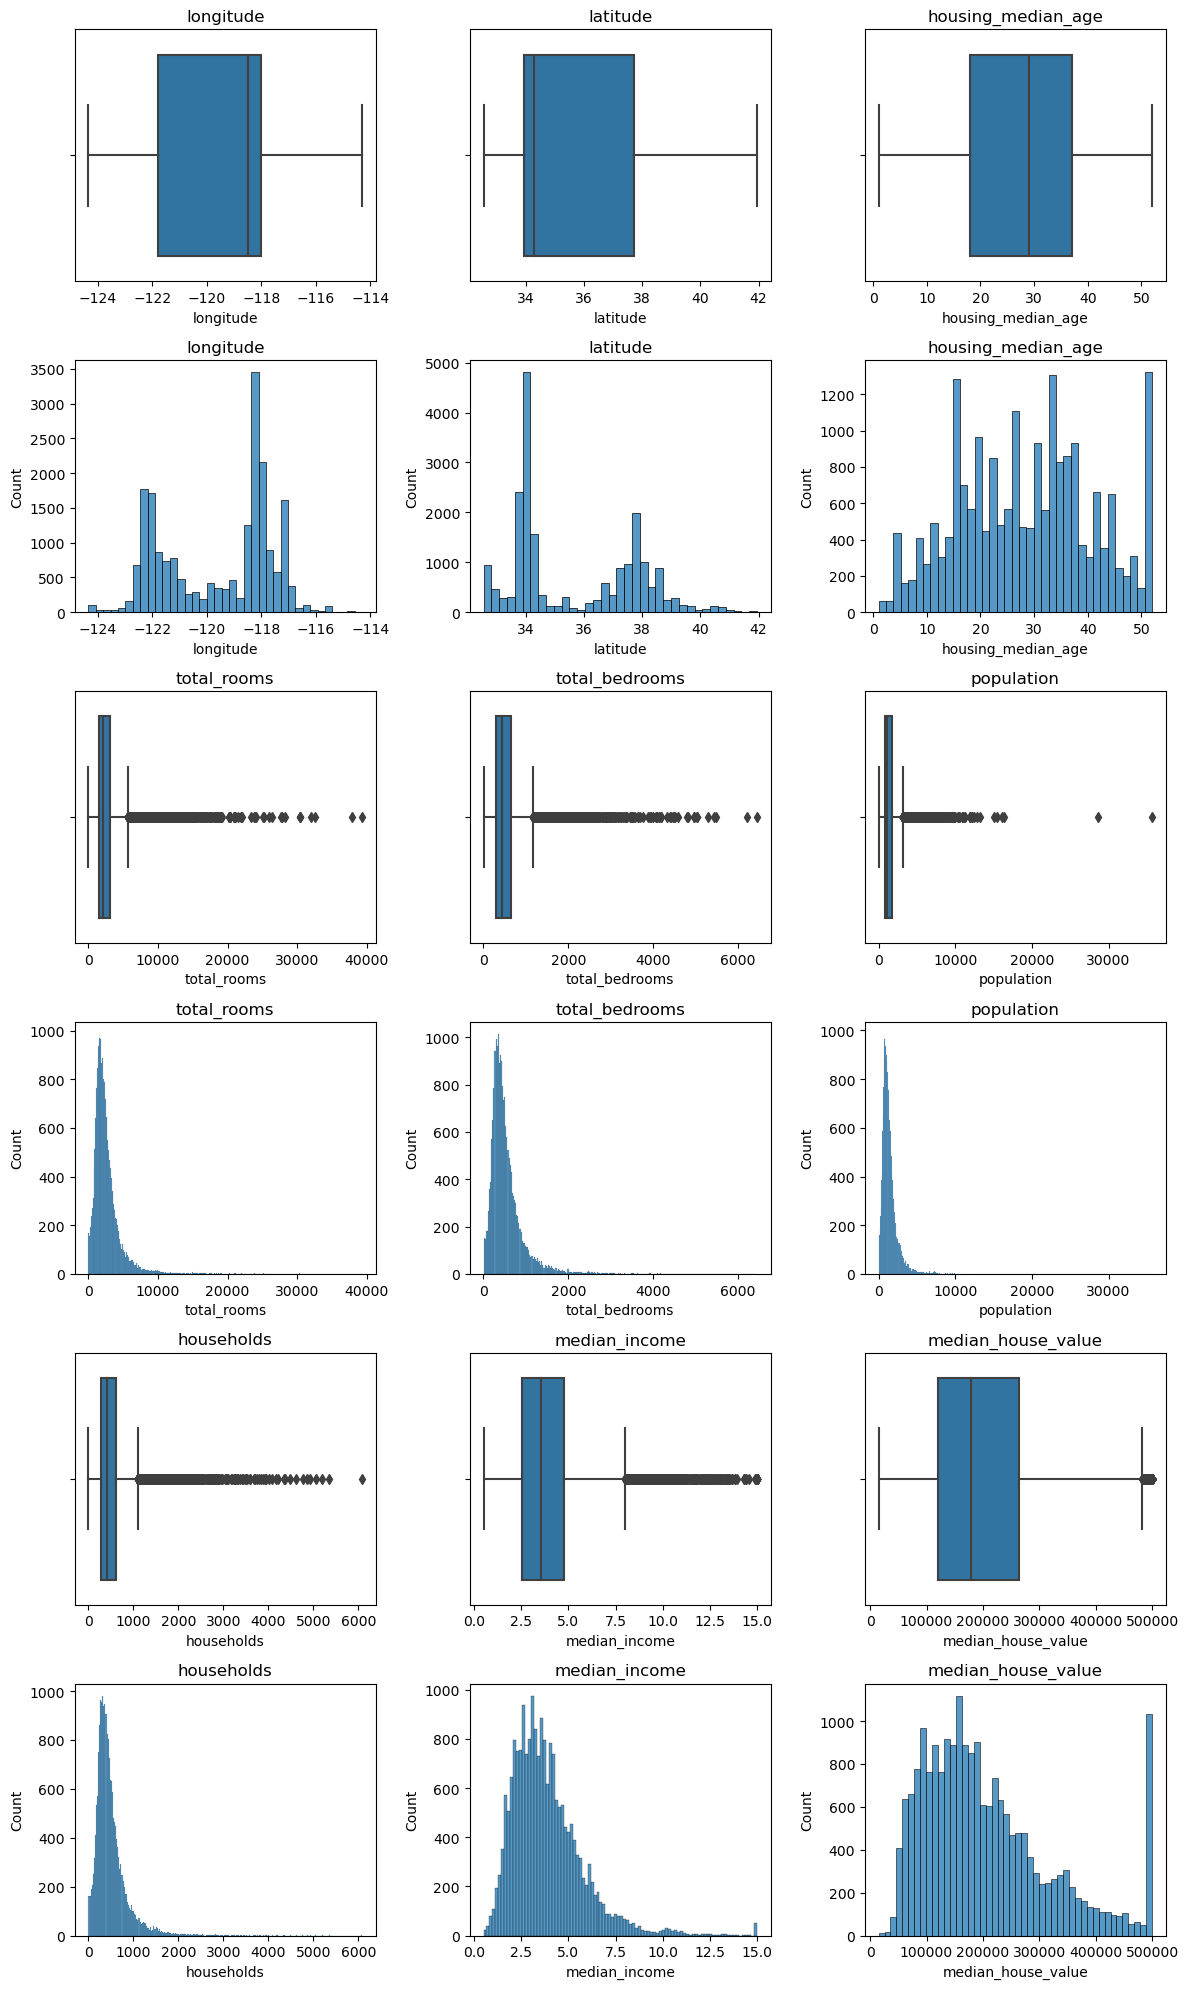

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define as variáveis para cada linha
var1 = ['longitude', 'latitude', 'housing_median_age']
var2 = ['total_rooms', 'total_bedrooms', 'population']
var3 = ['households', 'median_income', 'median_house_value']

# Cria uma figura com 6 linhas e 3 colunas
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 20))

# Plota os boxplots e histogramas
for i, var in enumerate(var1):
    sns.boxplot(x=df[var], ax=axes[0, i])
    axes[0, i].set_title(var)

for i, var in enumerate(var1):
    sns.histplot(x=df[var], ax=axes[1, i])
    axes[1, i].set_title(var)

for i, var in enumerate(var2):
    sns.boxplot(x=df[var], ax=axes[2, i])
    axes[2, i].set_title(var)

for i, var in enumerate(var2):
    sns.histplot(x=df[var], ax=axes[3, i])
    axes[3, i].set_title(var)

for i, var in enumerate(var3):
    sns.boxplot(x=df[var], ax=axes[4, i])
    axes[4, i].set_title(var)

for i, var in enumerate(var3):
    sns.histplot(x=df[var], ax=axes[5, i])
    axes[5, i].set_title(var)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe o gráfico
plt.show()


2.2.1.1) Visualização Exploratória de Dados

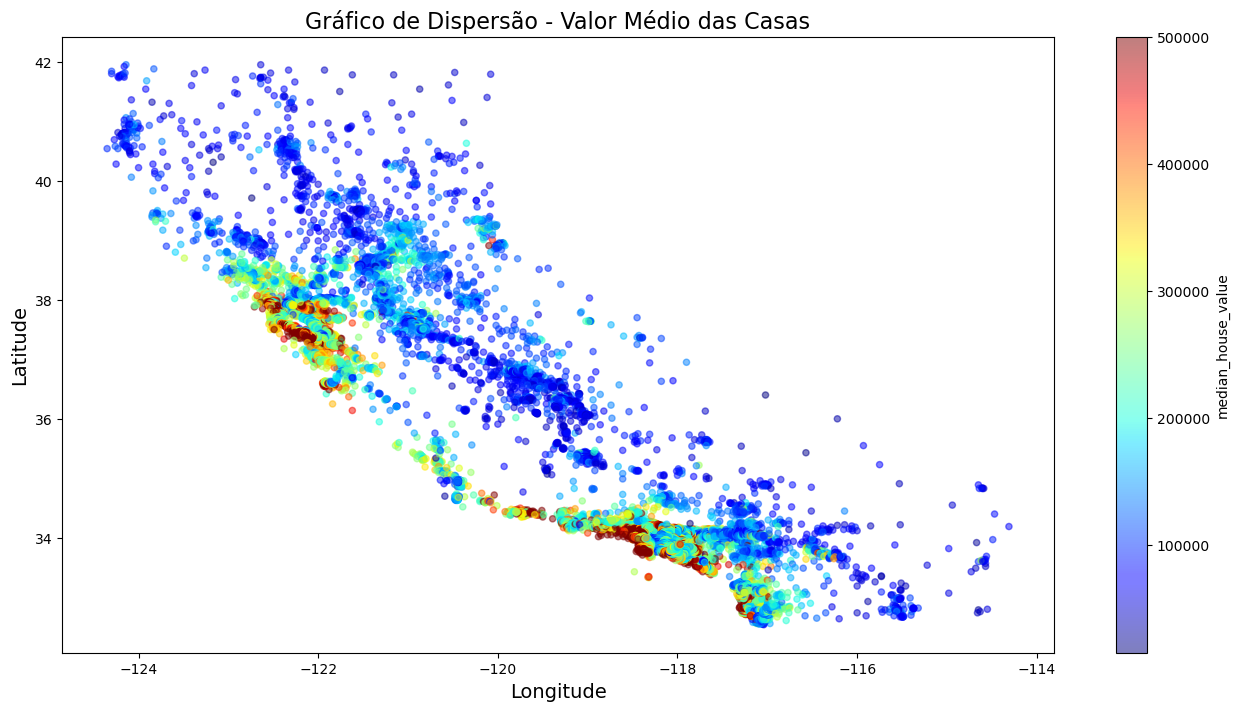

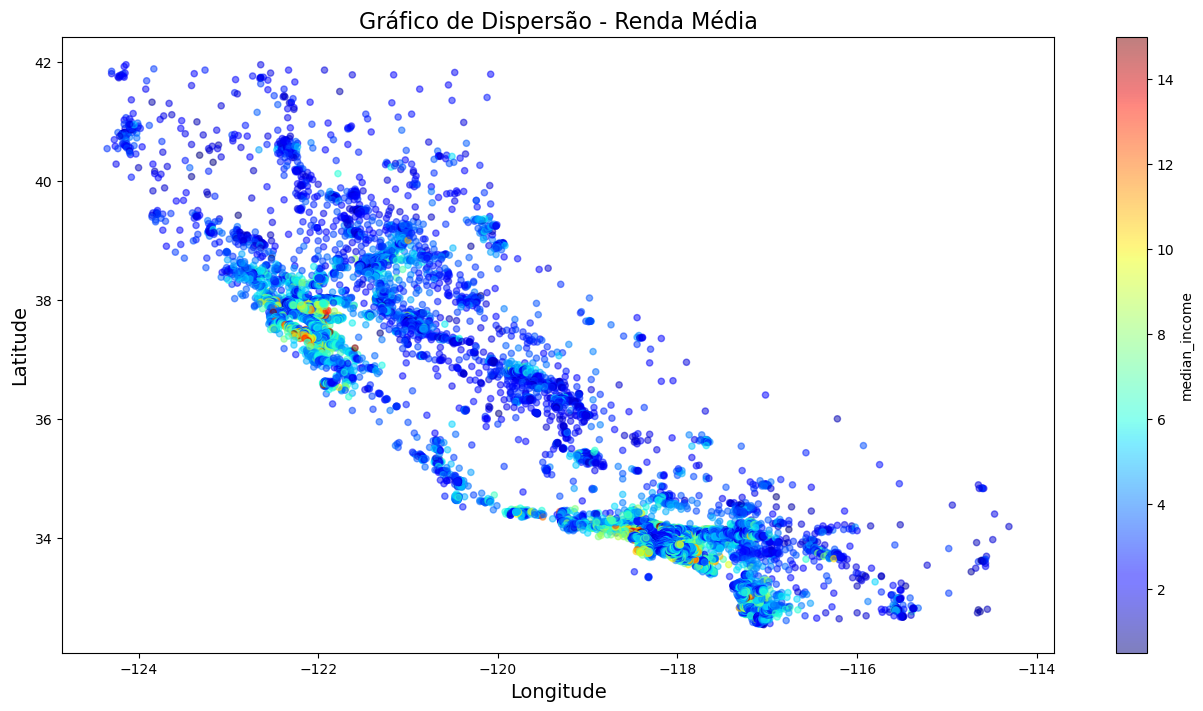

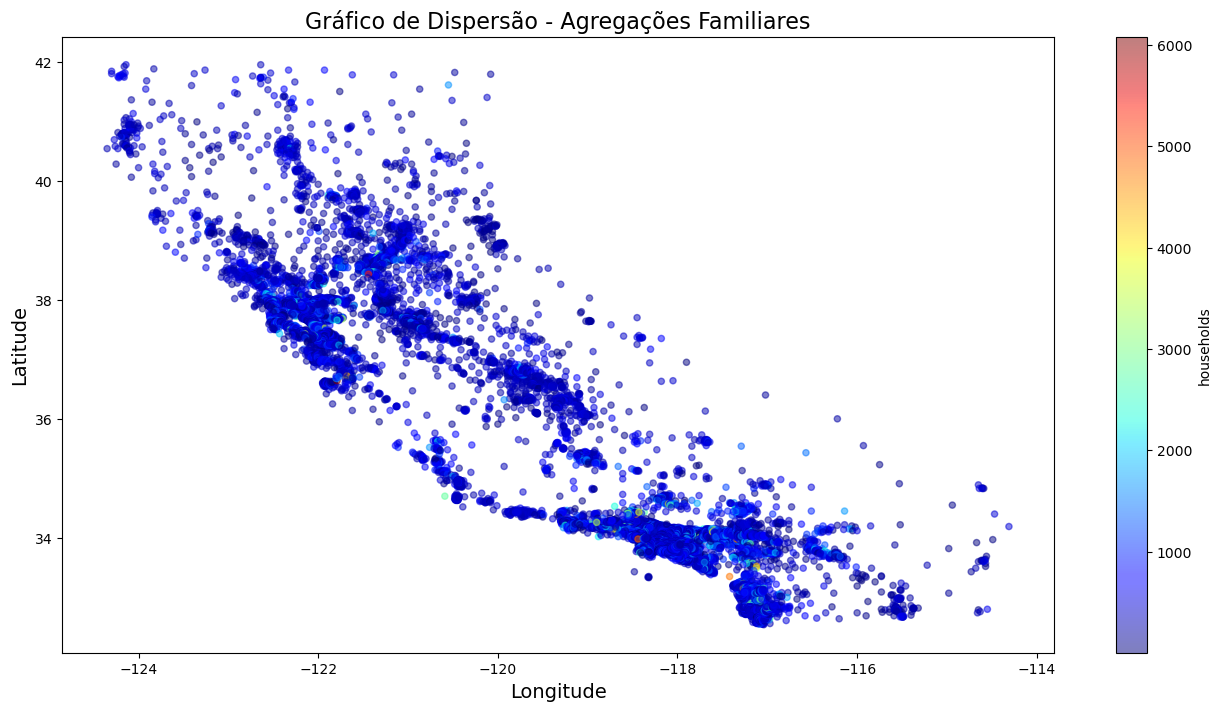

In [9]:
scatter1 = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, figsize=(16, 8),
                   c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
scatter1.set_xlabel("Longitude", fontsize = 14)
scatter1.set_ylabel("Latitude", fontsize = 14)
scatter1.set_title("Gráfico de Dispersão - Valor Médio das Casas", fontsize = 16)

scatter2 = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, figsize=(16, 8),
                   c="median_income", cmap=plt.get_cmap("jet"), colorbar=True)
scatter2.set_xlabel("Longitude", fontsize = 14)
scatter2.set_ylabel("Latitude", fontsize = 14)
scatter2.set_title("Gráfico de Dispersão - Renda Média", fontsize = 16)

scatter3 = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, figsize=(16, 8),
                   c="households", cmap=plt.get_cmap("jet"), colorbar=True)
scatter3.set_xlabel("Longitude", fontsize = 14)
scatter3.set_ylabel("Latitude", fontsize = 14)
scatter3.set_title("Gráfico de Dispersão - Agregações Familiares", fontsize = 16)

plt.show()

### 2.2.2) Variáveis categóricas

In [10]:
df['ocean_proximity'].value_counts(normalize = False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df['ocean_proximity'].value_counts(normalize = True) * 100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

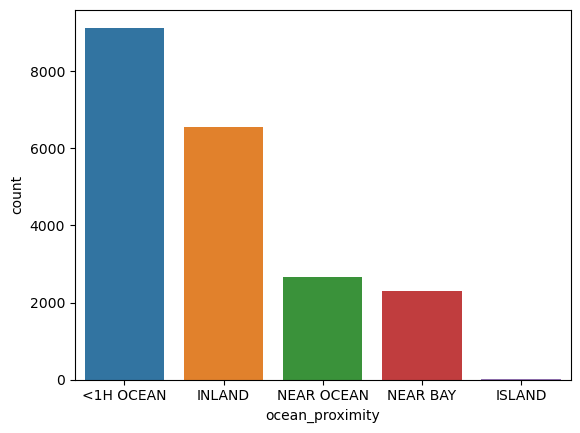

In [12]:
sns.countplot(x = 'ocean_proximity', data = df, order = df['ocean_proximity'].value_counts().index)
plt.show()

## 2.3) Remoção de missing-values

Vamos analisar as variáveis em busca de missing_values. A depender da quantidade, iremos decidir se utilizaremos métodos de preenchimento ou iremos descartar as linhas.

In [13]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
(207 / df.shape[0]) * 100

1.002906976744186

A variável __total_bedrooms__ apresenta 207 missing values, vamos descartar essas linhas uma vez que 207 linhas representam pouco mais de 1% do total de dados.

In [15]:
df.dropna(inplace = True)

## 2.4) Tratamento de Outliers

Iremos utilizar o z-score para determinar se consideramos dados como outliers ou não.

In [16]:
# Lista de colunas para tratar outliers
colunas = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Calculando os z-scores para cada coluna
z_scores = (df[colunas] - df[colunas].mean()) / df[colunas].std()

# Criando a coluna "is_outlier"
df['is_outlier'] = z_scores.apply(lambda row: any(row > 3) or any(row < -3), axis=1)

# Exibindo o DataFrame com a coluna "is_outlier"
display(df)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,is_outlier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,False


In [17]:
df['is_outlier'].value_counts()

False    19549
True       884
Name: is_outlier, dtype: int64

Nos estudos durante a elaboração deste notebook, percebi que os outliers FORA do conjunto de dados pioravam o desempenho dos modelos. Desta forma, mantenho esta parte no notebook como forma de ilustração, mas descarto o uso deste para este caso.

In [18]:
df.drop(columns = ['is_outlier'], axis = 1, inplace = True)

## 2.5) Análise de Correlação

Podemos verificar nos itens anteriores que as distribuições não são homogêneas entre si, nem obedecem uma distribuição normal. Vamos verificar a correlação entre as variáveis.

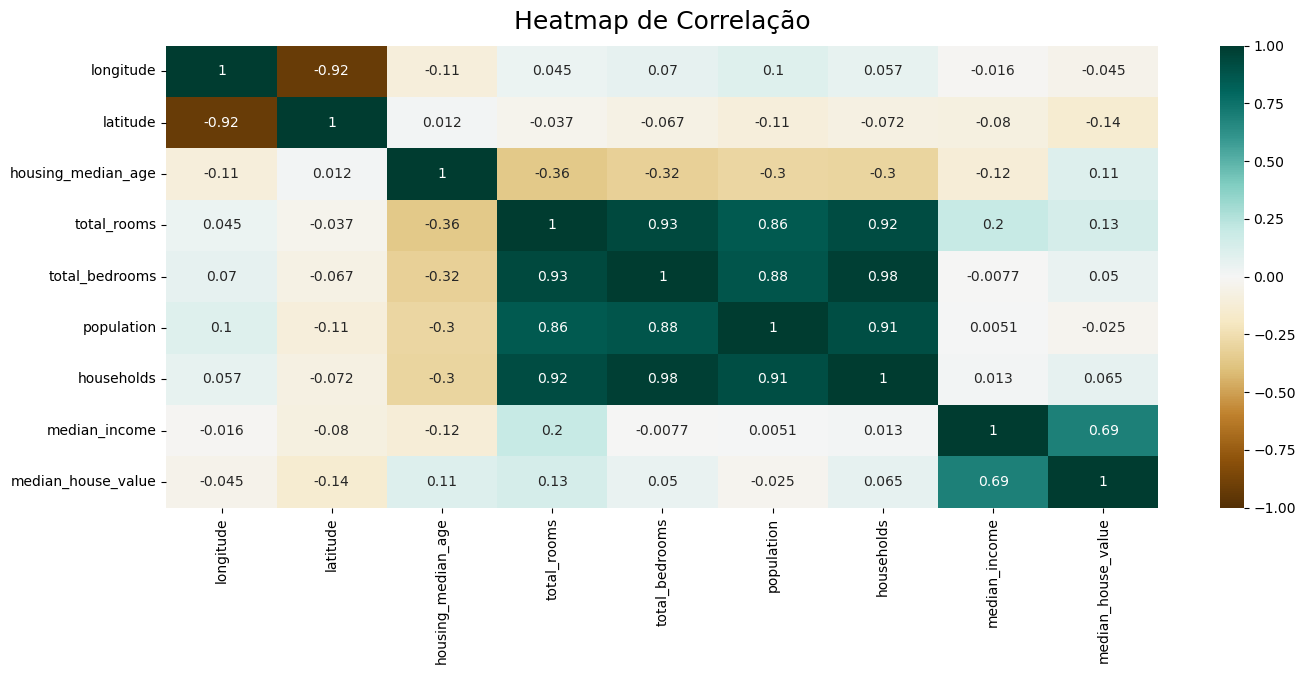

In [19]:
plt.figure(figsize=(16, 6))

# Crio o Heatmap de Correlação sem a coluna criada "is_outlier", uma vez que é uma coluna acessória 
# e não pertence aos dados originais
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':18}, pad=12);

Algumas observações sobre as variáveis:
* A alta correlação entre as variáveis `latitude` e `longitude` é esperada, dado que se tratam de dados espaciais.
* A correlação entre `total_rooms` e `total_bedrooms` é também esperada, uma vez que uma diz respeito à quantidade de cômodos das casas e outro diz respeito à quantidade de dormitórios, que é, por sua vez, um cômodo. 
* População e agregados familiares (`households`) também é esperada, uma vez que uma maior concentração de pessoas é esperada se houver maior agregados e vice versa. 
* O valor da casa e da renda também tem uma correlação esperada uma vez que um poder aquisitivo maior permite comprar casas com valores mais altos e vice versa.

# 3) Feature Engineering

## 3.1) Reagrupamento das categorias na variável ocean_proximity

### 3.1.1) Frequência das categorias

In [20]:
pd.DataFrame(df['ocean_proximity'].value_counts(normalize = True) * 100)

,ocean_proximity
<1H OCEAN,44.212793
INLAND,31.791709
NEAR OCEAN,12.861547
NEAR BAY,11.109480
ISLAND,0.024470


### 3.2.2) Análise gráfica

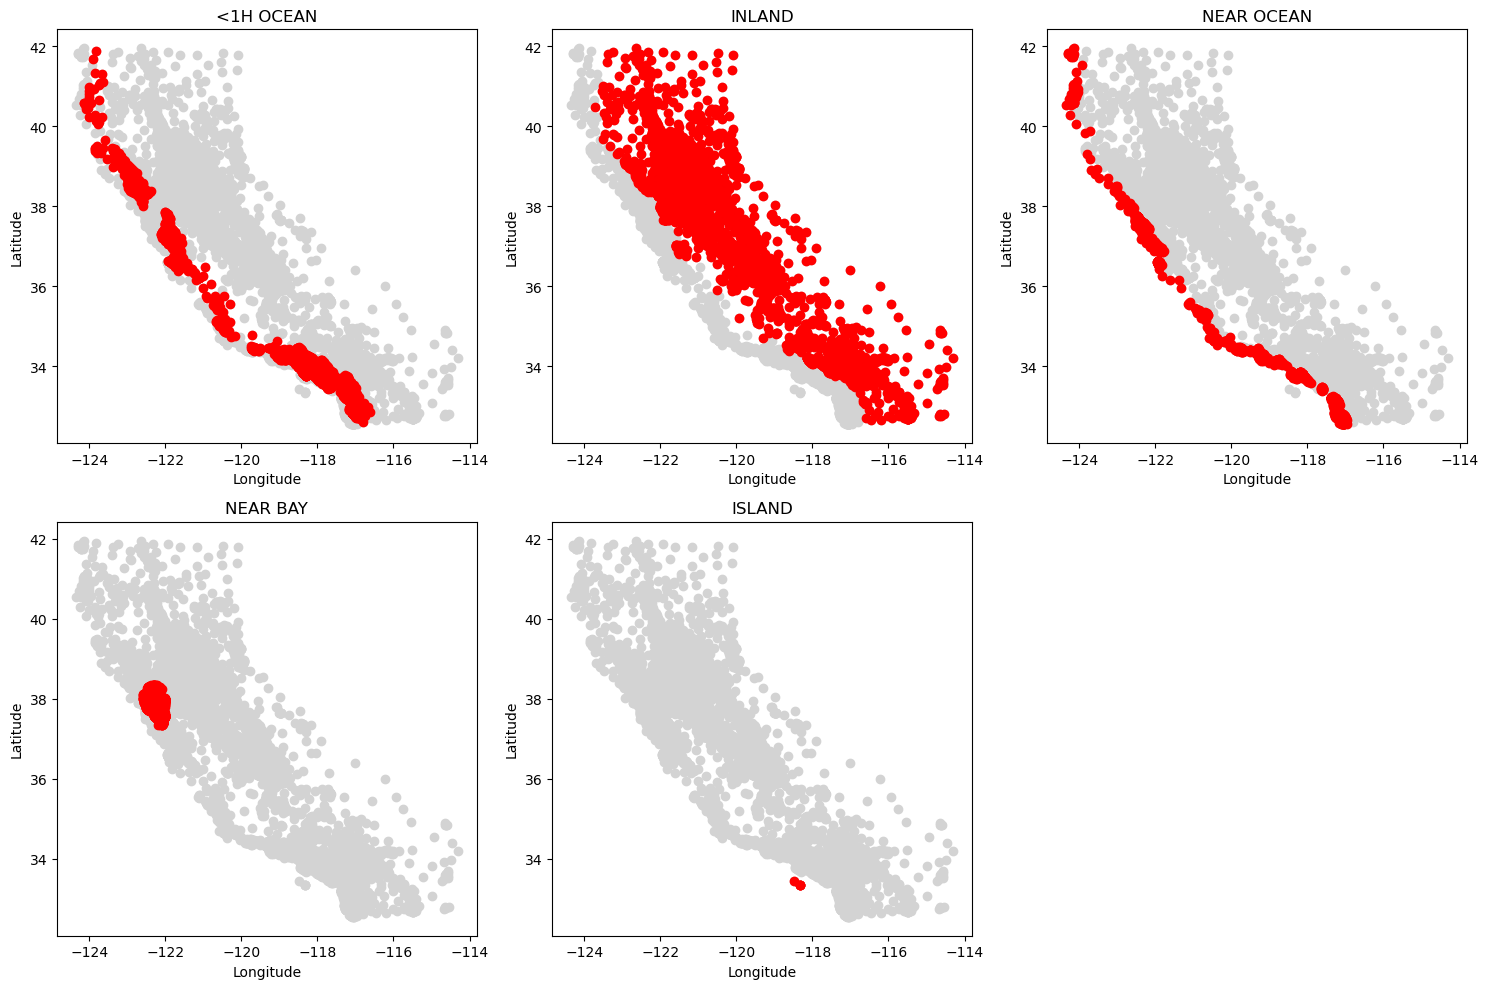

In [21]:
# Separando os pontos com base na coluna 'ocean_proximity'
cat_1 = df[df['ocean_proximity'] == '<1H OCEAN']
cat_2 = df[df['ocean_proximity'] == 'INLAND']
cat_3 = df[df['ocean_proximity'] == 'NEAR OCEAN']
cat_4 = df[df['ocean_proximity'] == 'NEAR BAY']
cat_5 = df[df['ocean_proximity'] == 'ISLAND']

# Configurando o tamanho do gráfico
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Configurando o scatterplot para o primeiro gráfico
axes[0, 0].scatter(df['longitude'], df['latitude'], color='lightgrey')
axes[0, 0].scatter(cat_1['longitude'], cat_1['latitude'], color='red')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')
axes[0, 0].set_title('<1H OCEAN')

# Configurando o scatterplot para o segundo gráfico
axes[0, 1].scatter(df['longitude'], df['latitude'], color='lightgrey')
axes[0, 1].scatter(cat_2['longitude'], cat_2['latitude'], color='red')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
axes[0, 1].set_title('INLAND')

# Configurando o scatterplot para o terceiro gráfico
axes[0, 2].scatter(df['longitude'], df['latitude'], color='lightgrey')
axes[0, 2].scatter(cat_3['longitude'], cat_3['latitude'], color='red')
axes[0, 2].set_xlabel('Longitude')
axes[0, 2].set_ylabel('Latitude')
axes[0, 2].set_title('NEAR OCEAN')

# Configurando o scatterplot para o quarto gráfico
axes[1, 0].scatter(df['longitude'], df['latitude'], color='lightgrey')
axes[1, 0].scatter(cat_4['longitude'], cat_4['latitude'], color='red')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_title('NEAR BAY')

# Configurando o scatterplot para o quinto gráfico
axes[1, 1].scatter(df['longitude'], df['latitude'], color='lightgrey')
axes[1, 1].scatter(cat_5['longitude'], cat_5['latitude'], color='red')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_title('ISLAND')

# Removendo o gráfico não utilizado
fig.delaxes(axes[1, 2])

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()


Com base nos gráficos acima, parece que é possível juntar 2 categorias <1H OCEAN e NEAR BAY como <1H OCEAN assim como NEAR OCEAN e ISLAND como NEAR OCEAN.

Vamos verificar visualmente se faz sentido.

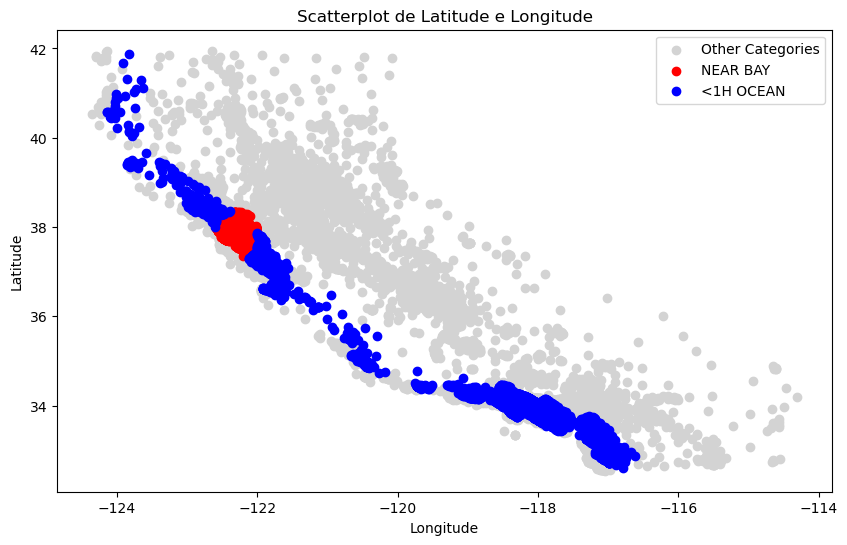

In [22]:
# Separando os pontos com base na coluna 'ocean_proximity'
cat_near_bay = df[df['ocean_proximity'] == 'NEAR BAY']
cat_1h_ocean = df[df['ocean_proximity'] == '<1H OCEAN']
other_cats = df[(df['ocean_proximity'] != 'NEAR BAY') & (df['ocean_proximity'] != '<1H OCEAN')]

# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plot dos pontos em cinza claro (outras categorias)
ax.scatter(other_cats['longitude'], other_cats['latitude'], color='lightgrey', label='Other Categories')

# Plot dos pontos 'NEAR BAY' em vermelho
ax.scatter(cat_near_bay['longitude'], cat_near_bay['latitude'], color='red', label='NEAR BAY')

# Plot dos pontos '<1H OCEAN' em azul
ax.scatter(cat_1h_ocean['longitude'], cat_1h_ocean['latitude'], color='blue', label='<1H OCEAN')

# Configurando o título e os rótulos dos eixos
ax.set_title('Scatterplot de Latitude e Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Configurando a legenda
ax.legend()

# Exibindo o gráfico
plt.show()


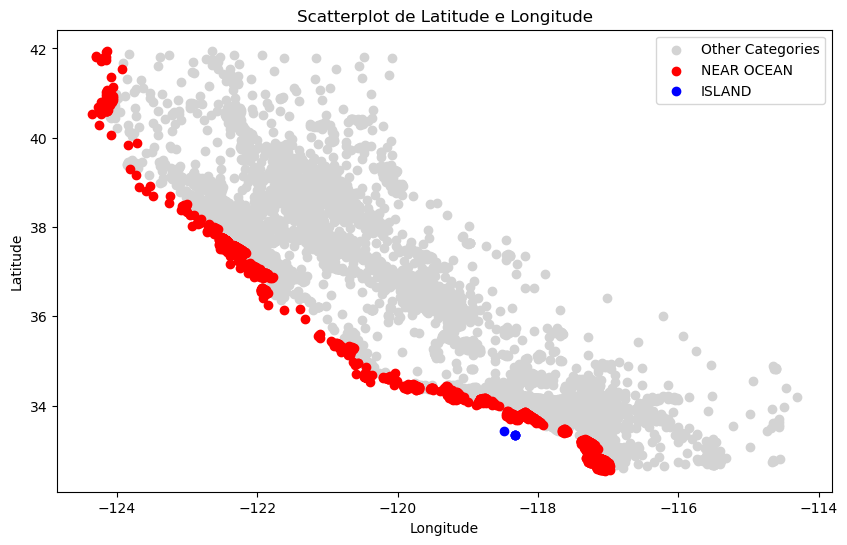

In [23]:
# Separando os pontos com base na coluna 'ocean_proximity'
cat_near_ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']
cat_island = df[df['ocean_proximity'] == 'ISLAND']
other_cats = df[(df['ocean_proximity'] != 'NEAR OCEAN') & (df['ocean_proximity'] != 'ISLAND')]

# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plot dos pontos em cinza claro (outras categorias)
ax.scatter(other_cats['longitude'], other_cats['latitude'], color='lightgrey', label='Other Categories')

# Plot dos pontos 'NEAR BAY' em vermelho
ax.scatter(cat_near_ocean['longitude'], cat_near_ocean['latitude'], color='red', label='NEAR OCEAN')

# Plot dos pontos '<1H OCEAN' em azul
ax.scatter(cat_island['longitude'], cat_island['latitude'], color='blue', label='ISLAND')

# Configurando o título e os rótulos dos eixos
ax.set_title('Scatterplot de Latitude e Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Configurando a legenda
ax.legend()

# Exibindo o gráfico
plt.show()


Como vimos, faz sentido a agrupação, então prosseguimos.

In [24]:
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda op: 'NEAR OCEAN' if (op == 'NEAR OCEAN' or op == 'ISLAND') else op)
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda op: '<1H OCEAN' if (op == '<1H OCEAN' or op == 'NEAR BAY') else op)

df['ocean_proximity'].value_counts(normalize = True) * 100

<1H OCEAN     55.322273
INLAND        31.791709
NEAR OCEAN    12.886018
Name: ocean_proximity, dtype: float64

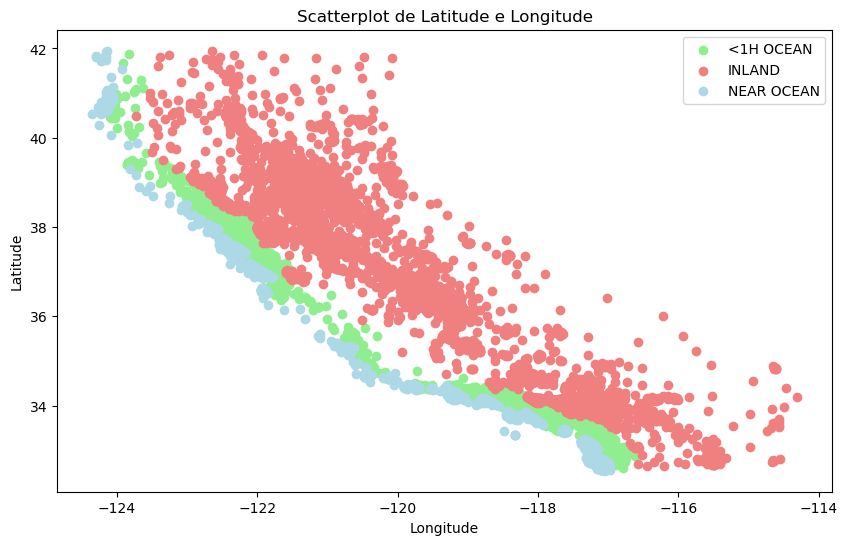

In [25]:
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os pontos com cores pastel
colors = ['lightgreen', 'lightcoral', 'lightblue']
labels = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN']
for i, label in enumerate(labels):
    subset = df[df['ocean_proximity'] == label]
    ax.scatter(subset['longitude'], subset['latitude'], color=colors[i], label=labels[i])

# Configurando o título e os rótulos dos eixos
ax.set_title('Scatterplot de Latitude e Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Configurando a legenda
ax.legend()

# Exibindo o gráfico
plt.show()


Desta forma, os dados ficam agrupados em menos categorias com representação geográfica semelhante, permitindo abrirmos mão das variáveis de latitude e longitude.

## 3.2) Drop de features não interessantes para Regressão

Latitude e longitude são dados espaciais. Tiro essas informações para não enviezar o modelo. A informação que pode ser relevante neste caso, é a proximidade com o mar, e isto está retratado na feature ocean_proximity.

In [26]:
df.drop(['latitude', 'longitude'], axis = 'columns', inplace = True)

## 3.3) Criação de Variáveis

### 3.3.1) `total_bedrooms` e `total_rooms`

Estas duas variáveis são altamente correlacionadas. A relação entre quantidade de dormitórios e cômodos pode ser mais interessante que as duas variáveis separadamente. Vamos criar a variável `bedrooms_per_rooms` e dropar as originais.

In [27]:
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms'] / df['population']

### 3.2.2) `population` e `households`

Estas duas variáveis são altamente correlacionadas. A relação entre os agregados familiares e a população  pode ser mais interessante que as duas variáveis separadamente. Vamos criar a variável `household_per_population` e dropar, por enquanto, apenas `households`.

In [28]:
df['population_per_household'] = df['population'] / df['households']

### 3.2.3) `median_income` e `population`

A média de renda é afetada pela população de um distrito. A média por distrito pode ocultar algum padrão, vamos criar uma nova variável `population_income` que será o produto entre `median_income` e `population`.

In [29]:
df['population_income'] = df['median_income'] * df['population']

### 3.2.4) `total_rooms` e `households`

A quantidade de quartos é afetada pela quantidade de agregações familiares em um distrito. Vamos criar uma nova variável `rooms_per_household` que será a razão entre `total_rooms` e `households`.

In [30]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

### 3.2.5) Deletar Variáveis Usadas na Engenharia de Recursos

In [31]:
df.drop(['total_bedrooms', 'total_rooms', 'households', 'population'], axis = 'columns', inplace = True)

## 3.4) Verificação da Correlação

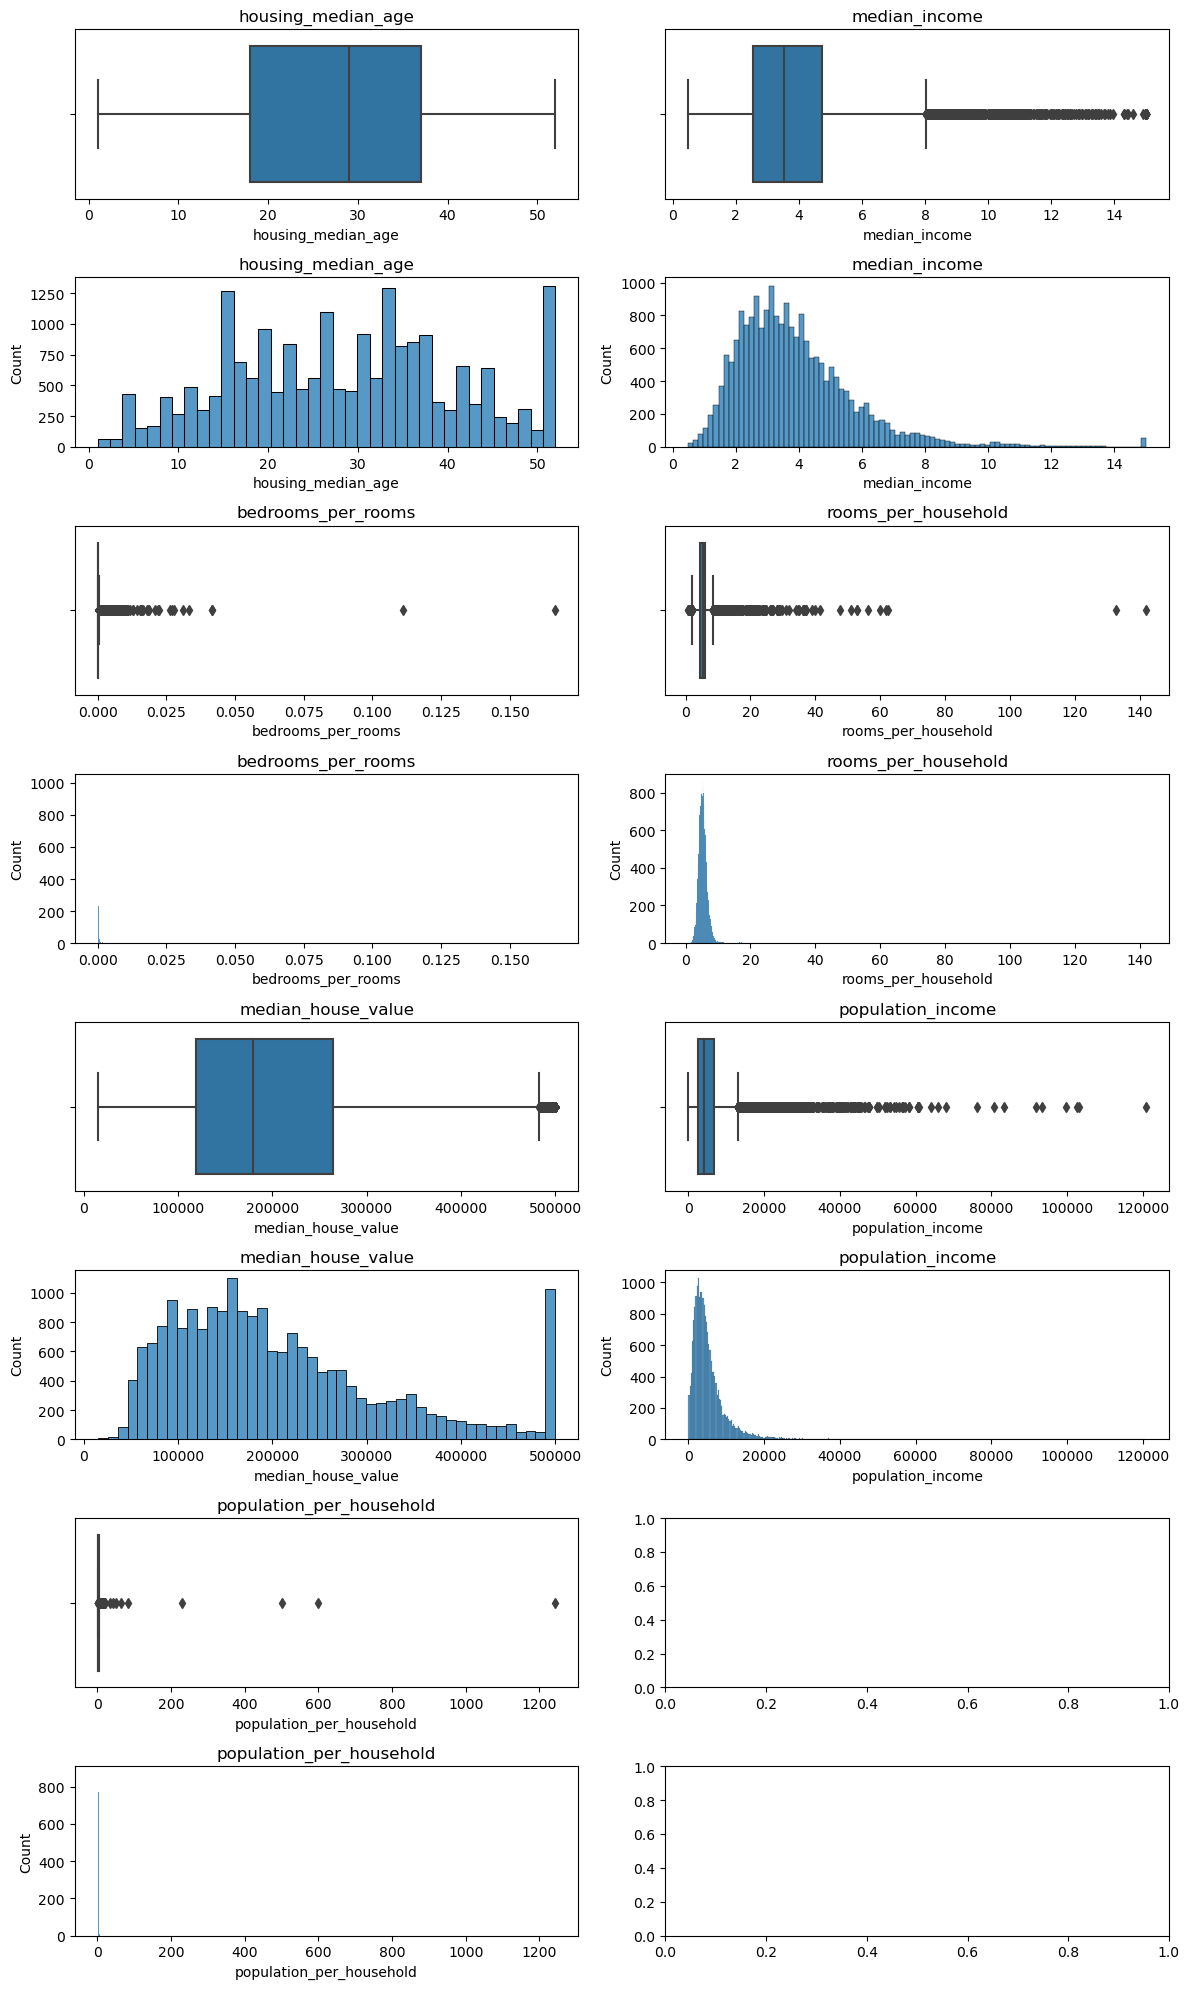

In [32]:
# Define as variáveis para cada linha
var1 = ['housing_median_age', 'median_income']
var2 = ['bedrooms_per_rooms', 'rooms_per_household']
var3 = ['median_house_value','population_income']
var4 = ['population_per_household']

# Cria uma figura com 6 linhas e 3 colunas
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 20))

# Plota os boxplots e histogramas
for i, var in enumerate(var1):
    sns.boxplot(x=df[var], ax=axes[0, i])
    axes[0, i].set_title(var)

for i, var in enumerate(var1):
    sns.histplot(x=df[var], ax=axes[1, i])
    axes[1, i].set_title(var)

for i, var in enumerate(var2):
    sns.boxplot(x=df[var], ax=axes[2, i])
    axes[2, i].set_title(var)

for i, var in enumerate(var2):
    sns.histplot(x=df[var], ax=axes[3, i])
    axes[3, i].set_title(var)

for i, var in enumerate(var3):
    sns.boxplot(x=df[var], ax=axes[4, i])
    axes[4, i].set_title(var)

for i, var in enumerate(var3):
    sns.histplot(x=df[var], ax=axes[5, i])
    axes[5, i].set_title(var)
    
for i, var in enumerate(var4):
    sns.boxplot(x=df[var], ax=axes[6, i])
    axes[6, i].set_title(var)

for i, var in enumerate(var4):
    sns.histplot(x=df[var], ax=axes[7, i])
    axes[7, i].set_title(var)


# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe o gráfico
plt.show()


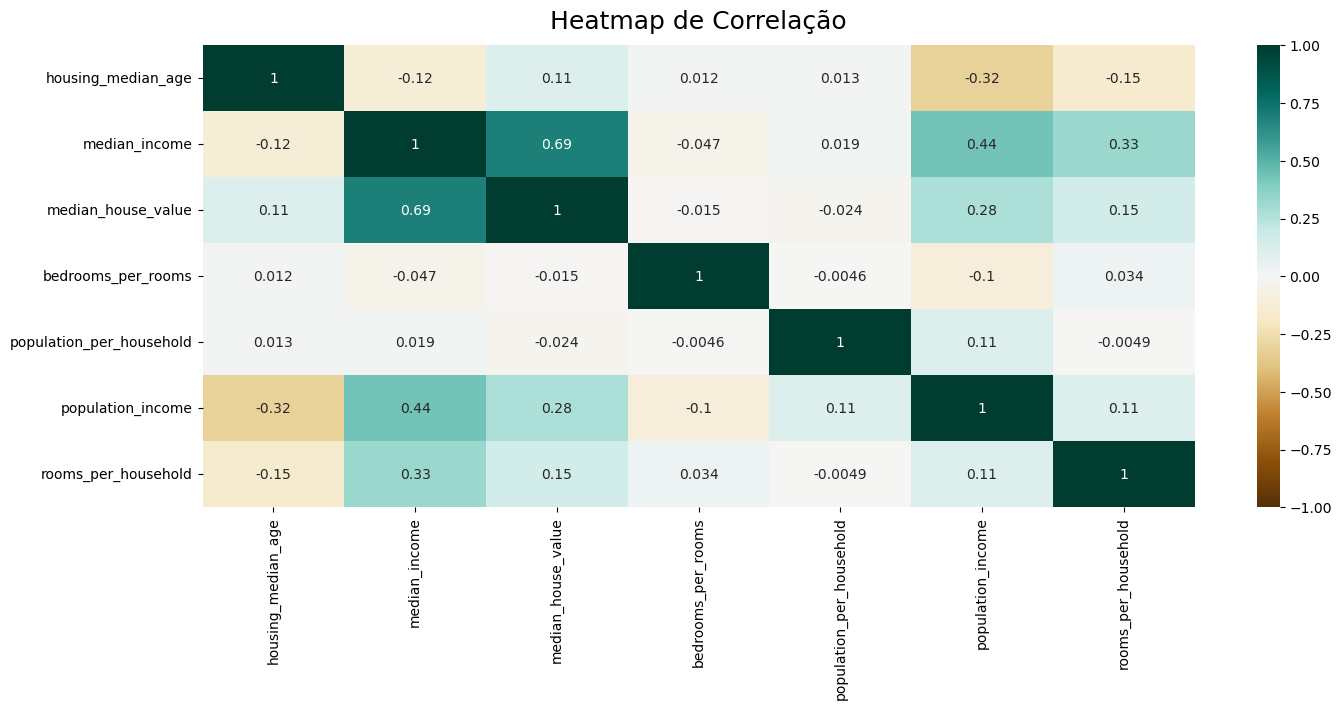

In [33]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':18}, pad=12);

Os dados inicialmente apresentavam correlações absolutas de mais de 0,9. Quando diminuímos a correlação entre as variáveis independentes em um modelo de regressão, ocorrem melhorias significativas. Isso acontece porque reduzimos problemas de multicolinearidade, que podem distorcer as estimativas dos coeficientes. Além disso, a diminuição da correlação facilita a interpretação dos coeficientes, permitindo entender melhor o impacto individual de cada variável no modelo. Também melhora a estabilidade do modelo, tornando-o menos sensível a pequenas mudanças, aumentando a confiabilidade dos resultados obtidos.

## 3.5) Melhorias nas Correlações

A correlação ainda não está como gostaria, então vamos melhorar ainda mais os dados.

### 3.5.1) Criação de Faixas de Renda

In [34]:
# Criação de 3 faixas de renda
renda_bins = 3
renda_labels = ['baixo', 'medio', 'alto']

# Criar as faixas usando a função cut do pandas
df['income_range'] = pd.cut(df['median_income'], bins = renda_bins, labels = renda_labels)

# Verificar as primeiras linhas do DataFrame com as faixas
df.head(5)

,housing_median_age,median_income,median_house_value,ocean_proximity,bedrooms_per_rooms,population_per_household,population_income,rooms_per_household,income_range
0,41.0,8.3252,452600.0,<1H OCEAN,0.000455,2.555556,2680.7144,6.984127,medio
1,21.0,8.3014,358500.0,<1H OCEAN,0.000065,2.109842,19931.6614,6.238137,medio
2,52.0,7.2574,352100.0,<1H OCEAN,0.000261,2.802260,3599.6704,8.288136,medio
3,52.0,5.6431,341300.0,<1H OCEAN,0.000331,2.547945,3148.8498,5.817352,medio
4,52.0,3.8462,342200.0,<1H OCEAN,0.000305,2.181467,2173.1030,6.281853,baixo


In [35]:
df['income_range'].value_counts()

baixo    16943
medio     3221
alto       269
Name: income_range, dtype: int64

### 3.5.2) Criação de Dummies para `ocean_proximity` e `income_range`

O XGBoost, que será usado posteriormente, dá problema com variáveis que contenham `[`. `]` ou `<`, por isso, mudaremos o valor da variável `<1H OCEAN` para `LT1H OCEAN`

In [36]:
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda op: op if op != '<1H OCEAN' else 'LT1H OCEAN')

In [37]:
df = pd.get_dummies(df, columns=['income_range'])
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.drop(columns = ['median_income'], inplace = True)

## 3.6) Mapa de Correlação Final e Visualização do DataFrame

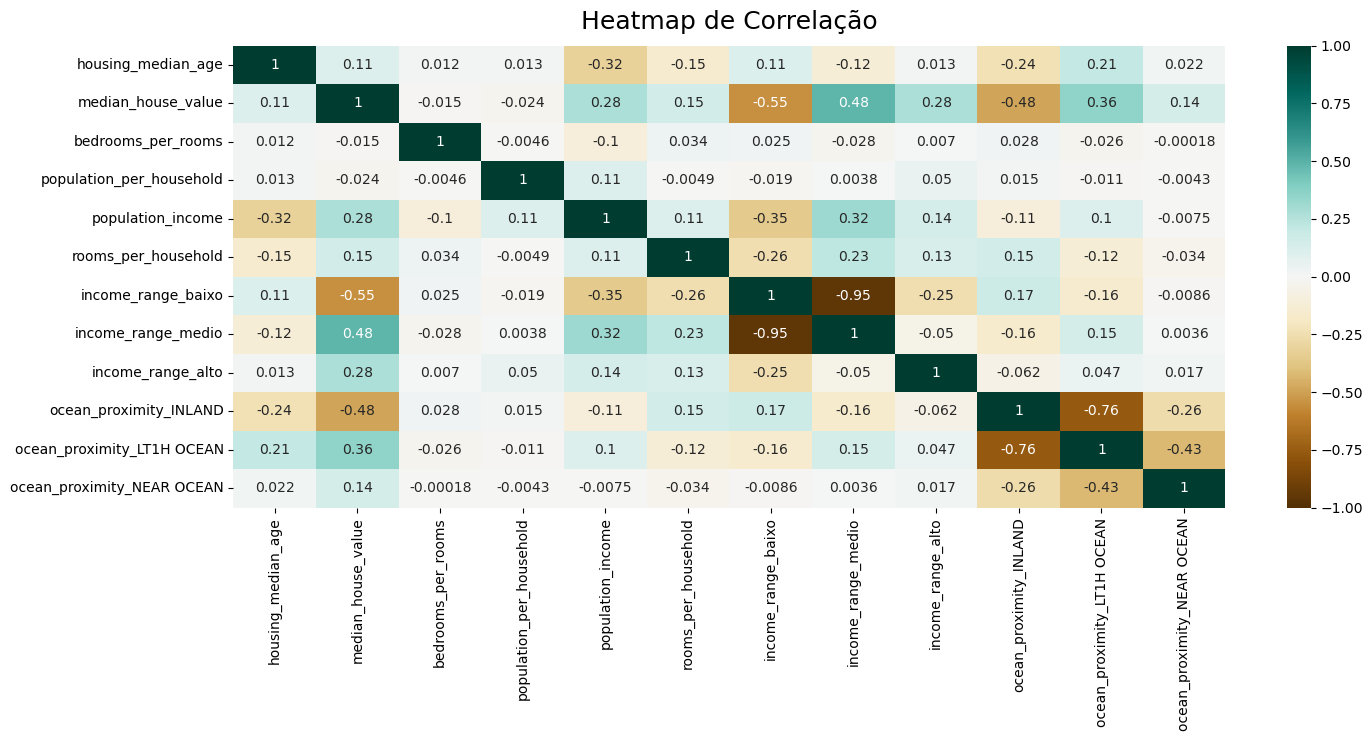

In [38]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':18}, pad=12);

As variáveis `income_range_medio` e `ocean_proximity_INLAND` ainda apresentam alta correlação. Vamos removê-las uma vez que já temos as dummies que as representam.

In [39]:
df.drop(columns = ['income_range_medio', 'ocean_proximity_INLAND'], inplace = True)

O mapa de correlação final ficou assim:

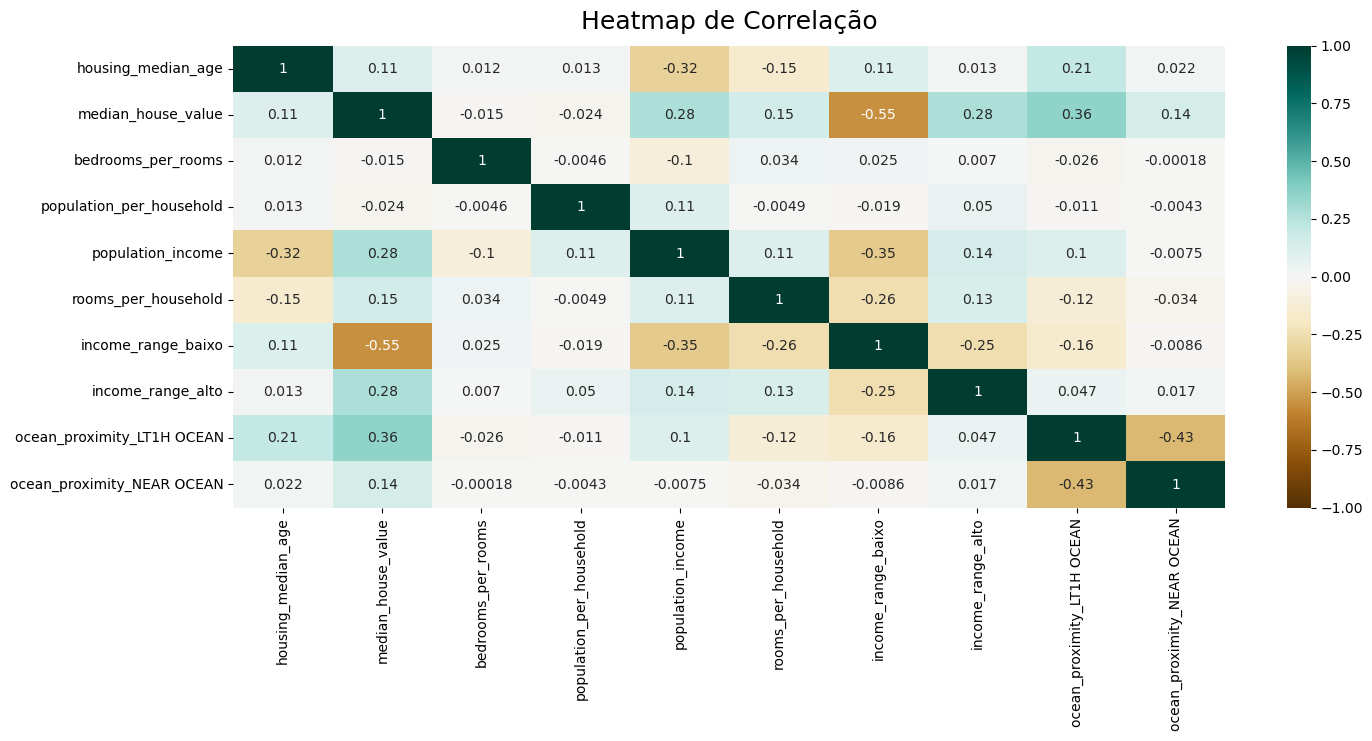

In [40]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':18}, pad=12);

In [41]:
display(df.head(5))
display(df.tail(5))

,housing_median_age,median_house_value,bedrooms_per_rooms,population_per_household,population_income,rooms_per_household,income_range_baixo,income_range_alto,ocean_proximity_LT1H OCEAN,ocean_proximity_NEAR OCEAN
0,41.0,452600.0,0.000455,2.555556,2680.7144,6.984127,0,0,1,0
1,21.0,358500.0,0.000065,2.109842,19931.6614,6.238137,0,0,1,0
2,52.0,352100.0,0.000261,2.802260,3599.6704,8.288136,0,0,1,0
3,52.0,341300.0,0.000331,2.547945,3148.8498,5.817352,0,0,1,0
4,52.0,342200.0,0.000305,2.181467,2173.1030,6.281853,1,0,1,0


,housing_median_age,median_house_value,bedrooms_per_rooms,population_per_household,population_income,rooms_per_household,income_range_baixo,income_range_alto,ocean_proximity_LT1H OCEAN,ocean_proximity_NEAR OCEAN
20635,25.0,78100.0,0.000266,2.560606,1318.4535,5.045455,1,0,0,0
20636,18.0,77100.0,0.000605,3.122807,910.2208,6.114035,1,0,0,0
20637,17.0,92300.0,0.000214,2.325635,1711.9000,5.205543,1,0,0,0
20638,18.0,84700.0,0.000297,2.123209,1383.5952,5.329513,1,0,0,0
20639,16.0,89400.0,0.000159,2.616981,3312.9882,5.254717,1,0,0,0


## 4) Modelos de Regressão

### 4.1) Normalização e Separação dos Dados de Treino e Teste

In [42]:
# Separar os dados em features e target
X = df.drop(columns = ['median_house_value'])
y = df['median_house_value']

In [43]:
# Aplicar o StandardScaler aos dados numéricos
scaler = StandardScaler()
numeric_features = ['housing_median_age', 'bedrooms_per_rooms', 'population_per_household', 'population_income', 'rooms_per_household']
                    
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [44]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_STATE)

### 4.2) Modelo: Decision Tree

In [45]:
# Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

# Regressão Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Regressão Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Regressão ElasticNet
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)
elasticnet_predictions = elasticnet_model.predict(X_test)

elasticnet_mae = mean_absolute_error(y_test, elasticnet_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
elasticnet_rmse = mean_squared_error(y_test, elasticnet_predictions, squared=False)
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)

# Regressão de Árvore de Decisão
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
tree_r2 = r2_score(y_test, tree_predictions)

# Random Forest
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

forest_mae = mean_absolute_error(y_test, forest_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)
forest_r2 = r2_score(y_test, forest_predictions)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_r2 = r2_score(y_test, gb_predictions)

# LightGBM
lgbm_model = LGBMRegressor(n_estimators=100)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)

lgbm_mae = mean_absolute_error(y_test, lgbm_predictions)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_rmse = mean_squared_error(y_test, lgbm_predictions, squared=False)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Criar dicionário com os resultados
results = {
    'Modelo': ['Regressão Linear', 'Regressão Ridge', 'Regressão Lasso', 'Regressão ElasticNet', 'Regressão de Árvore de Decisão',
               'Random Forest', 'Gradient Boosting', 'LightGBM', 'XGBoost'],
    'MAE': [linear_mae, ridge_mae, lasso_mae, elasticnet_mae, tree_mae, forest_mae, gb_mae, lgbm_mae, xgb_mae],
    'MSE': [linear_mse, ridge_mse, lasso_mse, elasticnet_mse, tree_mse, forest_mse, gb_mse, lgbm_mse, xgb_mse],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse, elasticnet_rmse, tree_rmse, forest_rmse, gb_rmse, lgbm_rmse, xgb_rmse],
    'R²': [linear_r2, ridge_r2, lasso_r2, elasticnet_r2, tree_r2, forest_r2, gb_r2, lgbm_r2, xgb_r2]
}

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results)

# Exibir o DataFrame
display(results_df)

,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,59598.726436,6.403475e+09,80021.714585,0.517565
1,Regressão Ridge,59601.345120,6.403327e+09,80020.788156,0.517576
2,Regressão Lasso,59599.129342,6.403469e+09,80021.679674,0.517565
3,Regressão ElasticNet,76489.251357,9.699925e+09,98488.198090,0.269212
4,Regressão de Árvore de Decisão,59024.714216,7.198956e+09,84846.664553,0.457634
5,Random Forest,43621.878693,3.802127e+09,61661.392372,0.713549
6,Gradient Boosting,45471.734068,3.947042e+09,62825.487227,0.702631
7,LightGBM,42224.543655,3.524984e+09,59371.577792,0.734429
8,XGBoost,42799.822438,3.720314e+09,60994.376021,0.719713


**Considerando**

1. **MAE (Mean Absolute Error - Erro Médio Absoluto)**:
    O MAE mede a média absoluta dos erros entre as previsões do modelo e os valores reais. Ele calcula a diferença absoluta entre cada previsão e o valor real correspondente e, em seguida, calcula a média dessas diferenças absolutas. O MAE representa o tamanho médio dos erros do modelo, independentemente de serem positivos ou negativos. Quanto menor o valor do MAE, melhor é o desempenho do modelo.

2. **MSE (Mean Squared Error - Erro Quadrático Médio)**:
    O MSE calcula a média dos quadrados dos erros entre as previsões do modelo e os valores reais. Ele calcula a diferença ao quadrado entre cada previsão e o valor real correspondente, e em seguida, calcula a média dessas diferenças quadráticas. O MSE penaliza mais os erros maiores em relação aos erros menores. Quanto menor o valor do MSE, melhor é o desempenho do modelo.

3. **RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio)**:
    O RMSE é a raiz quadrada do MSE. Ele representa a raiz quadrada da média dos quadrados dos erros. O RMSE é uma métrica amplamente utilizada pois tem a mesma unidade de medida que o valor previsto (nesse caso, o valor das casas), o que facilita a interpretação. Quanto menor o valor do RMSE, melhor é o desempenho do modelo.

4. **R² (R-squared - Coeficiente de Determinação)**:
    O R² mede a proporção da variabilidade dos dados que é explicada pelo modelo. Ele varia de 0 a 1 e é interpretado como a porcentagem de variação da variável dependente (no caso, o valor das casas) que é explicada pelas variáveis independentes (ou seja, as características do conjunto de dados). Um R² mais próximo de 1 indica que o modelo consegue explicar uma grande parte da variação dos dados, enquanto um R² próximo de 0 indica que o modelo não consegue explicar bem a variação. No entanto, é importante lembrar que o R² não indica se o modelo é adequado ou não para a tarefa em questão.

Pelas métricas apresentadas, temos que LightGBM foi o que apresentou melhor MAE, MSE, RMSE e R², i.e., todas as métrias melhores, para o conjunto de dados apresentado.

O pior desempenho ficou para a Regressão ElasticNet.